In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data Visualization

<AxesSubplot:xlabel='Gender', ylabel='count'>

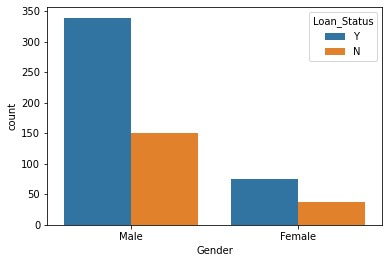

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot( x = df['Gender'], data = df, hue = 'Loan_Status')


There are more Men than Women (approx. 3x)


<AxesSubplot:xlabel='Married', ylabel='count'>

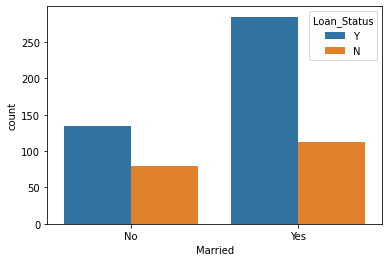

In [15]:
sns.countplot( x = df['Married'], data = df, hue = 'Loan_Status')

2/3rd of the population in the dataset is Marred and are more likely to be granted loans.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

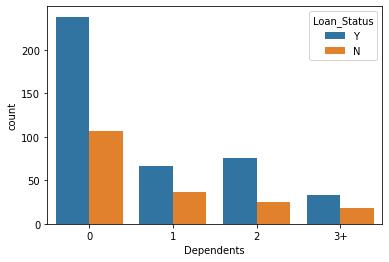

In [16]:
sns.countplot( x = df['Dependents'], data = df, hue = 'Loan_Status')

Majority of the population have zero dependents and are also likely to accepted for loan.

<AxesSubplot:xlabel='Education', ylabel='count'>

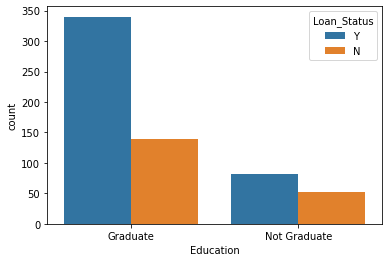

In [17]:
sns.countplot( x = df['Education'], data = df, hue = 'Loan_Status')

About 5/6th of the population is Graduate and graduates have higher propotion of loan approval

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

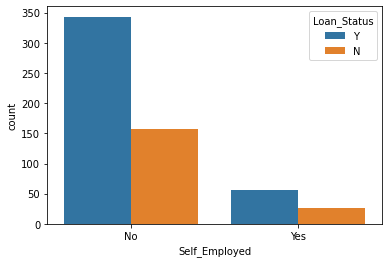

In [18]:
sns.countplot( x = df['Self_Employed'], data = df, hue = 'Loan_Status')

5/6th of population is not self employed

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

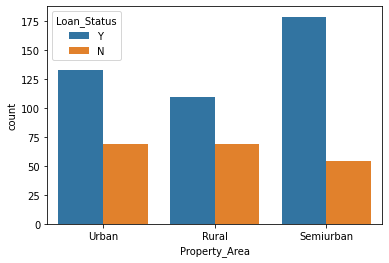

In [20]:
sns.countplot( x = df['Property_Area'], data = df, hue = 'Loan_Status')

More applicants from Semi-urban and also likely to be granted loans.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

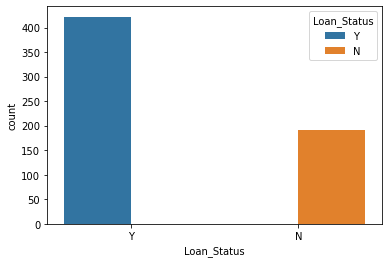

In [21]:
sns.countplot( x = df['Loan_Status'], data = df, hue = 'Loan_Status')

About 2/3rd of applicants have been granted loan.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

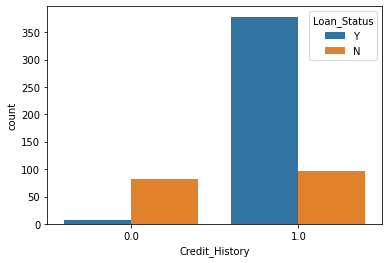

In [22]:
sns.countplot( x = df['Credit_History'], data = df, hue = 'Loan_Status')

Applicant with credit history are far more likely to be accepted.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

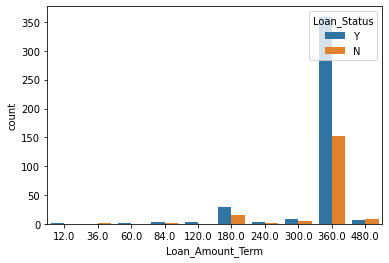

In [24]:
sns.countplot( x = df['Loan_Amount_Term'], data = df, hue = 'Loan_Status')

Majority of the loans taken are for 360 Months (30 years).

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

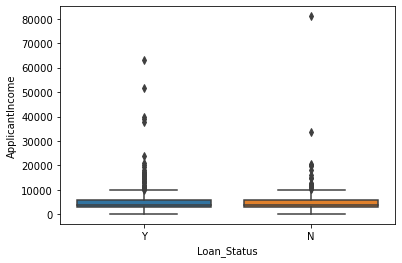

In [25]:
sns.boxplot(y = df['ApplicantIncome'], data = df, x='Loan_Status')

No clear relation with Loan Status w.r.t. Applicant Income

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

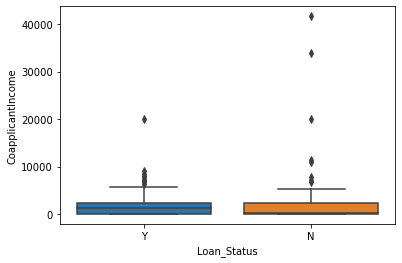

In [26]:
sns.boxplot(y = df['CoapplicantIncome'], data = df, x='Loan_Status')

No such relation with Loan Status w.r.t. Co-applicant Income

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

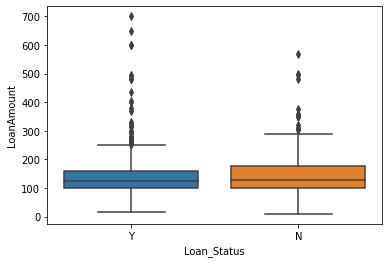

In [27]:
sns.boxplot(y = df['LoanAmount'], data = df, x='Loan_Status')

No such relation with Loan Status w.r.t. Loan Amount as well

In [61]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Gender'] = le.fit_transform( df['Gender'] )
df['Married'] = le.fit_transform( df['Married'] )
df['Education'] = le.fit_transform( df['Education'] )
df['Dependents'] = le.fit_transform( df['Dependents'] )
df['Self_Employed'] = le.fit_transform( df['Self_Employed'] )
df['Property_Area'] = le.fit_transform( df['Property_Area'] )
df['Loan_Status'] = le.fit_transform( df['Loan_Status'] )
df['Property_Area'] = le.fit_transform( df['Property_Area'] )
df['Loan_Status'] = le.fit_transform( df['Loan_Status'] )
df['Credit_History'] = le.fit_transform( df['Credit_History'] )

Coverting all categorical columns to numeric values

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int32(5), int64(4), object(1)
memory usage: 50.5+ KB


In [63]:
df['Loan_ID'].nunique()

614

Dropping Loan_ID column as it wont partiicipate much in predicting the outcome

In [64]:
df.drop(['Loan_ID'], axis = 1, inplace = True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     614 non-null    int64  
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(3), int32(5), int64(4)
memory usage: 45.7 KB


In [66]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [67]:
df['LoanAmount'].fillna(value = df['LoanAmount'].mean(), inplace = True)
df['Loan_Amount_Term'].fillna(value = df['Loan_Amount_Term'].mean(), inplace = True)

Filling null values with the mean value of the column for Loan Amount & Loan Amount Term

In [68]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now, no null values to be handeled

# Model Selection

In [70]:
x = df.drop( ['Loan_Status'], axis = 1)
y = df['Loan_Status']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state = 42 )

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

rf = RandomForestClassifier(max_depth=10, max_features=10, n_estimators=25)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
print('Classification Report with RandomForestClassifier :', "\n",  classification_report(y_test,rf_pred))
print('Accuracy with RandomForestClassifier : ', accuracy_score(rf_pred,y_test) , "\n")
print('Confusion Matrix with RandomForestClassifier : ', "\n", confusion_matrix(rf_pred,y_test), "\n")
print('roc_auc_score with RandomForestClassifier: ', roc_auc_score(rf_pred,y_test))

Classification Report with RandomForestClassifier : 
               precision    recall  f1-score   support

           0       0.79      0.44      0.57        43
           1       0.76      0.94      0.84        80

    accuracy                           0.76       123
   macro avg       0.77      0.69      0.70       123
weighted avg       0.77      0.76      0.74       123

Accuracy with RandomForestClassifier :  0.7642276422764228 

Confusion Matrix with RandomForestClassifier :  
 [[19  5]
 [24 75]] 

roc_auc_score with RandomForestClassifier:  0.7746212121212122


In [76]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)

print('Classification Report with DecisionTreeClassifier :', "\n",  classification_report(y_test,dtc_pred))
print('Accuracy with DecisionTreeClassifier : ', accuracy_score(dtc_pred,y_test) , "\n")
print('Confusion Matrix with DecisionTreeClassifier : ', "\n", confusion_matrix(dtc_pred,y_test), "\n")
print('roc_auc_score with DecisionTreeClassifier: ', roc_auc_score(dtc_pred,y_test))

Classification Report with DecisionTreeClassifier : 
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Accuracy with DecisionTreeClassifier :  0.7886178861788617 

Confusion Matrix with DecisionTreeClassifier :  
 [[18  1]
 [25 79]] 

roc_auc_score with DecisionTreeClassifier:  0.8534919028340081


In [79]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

print('Classification Report with XGBClassifier :', "\n",  classification_report(y_test,xgb_pred))
print('Accuracy with XGBClassifier : ', accuracy_score(xgb_pred,y_test) , "\n")
print('Confusion Matrix with XGBClassifier : ', "\n", confusion_matrix(xgb_pred,y_test), "\n")
print('roc_auc_score with XGBClassifier: ', roc_auc_score(xgb_pred,y_test))

[15:39:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report with XGBClassifier : 
               precision    recall  f1-score   support

           0       0.75      0.49      0.59        43
           1       0.77      0.91      0.83        80

    accuracy                           0.76       123
   macro avg       0.76      0.70      0.71       123
weighted avg       0.76      0.76      0.75       123

Accuracy with XGBClassifier :  0.7642276422764228 

Confusion Matrix with XGBClassifier :  
 [[21  7]
 [22 73]] 

roc_auc_score with XGBClassifier:  0.7592105263157894


In [80]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

print('Classification Report with LogisticRegression :', "\n",  classification_report(y_test,lr_predict))
print('Accuracy with LogisticRegression : ', accuracy_score(lr_predict,y_test) , "\n")
print('Confusion Matrix with LogisticRegression : ', "\n", confusion_matrix(lr_predict,y_test), "\n")
print('roc_auc_score with LogisticRegression: ', roc_auc_score(lr_predict,y_test))

Classification Report with LogisticRegression : 
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Accuracy with LogisticRegression :  0.7886178861788617 

Confusion Matrix with LogisticRegression :  
 [[18  1]
 [25 79]] 

roc_auc_score with LogisticRegression:  0.8534919028340081


In [83]:
import pickle
filename = 'loan_prediction.pkl'
pickle.dump(dtc, open(filename, 'wb' ))

Saving the model with DecisionTreeClassifier  as the accuracy is 79 % the greatest among all the other models

In [84]:
filename = 'loan_prediction.pkl'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.7886178861788617
